In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
num_classes=10
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 20s 11ms/step - loss: 0.6189 - accuracy: 0.8109 - val_loss: 0.3079 - val_accuracy: 0.9125
Epoch 2/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3085 - accuracy: 0.9094 - val_loss: 0.2141 - val_accuracy: 0.9397
Epoch 3/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2391 - accuracy: 0.9290 - val_loss: 0.1644 - val_accuracy: 0.9557
Epoch 4/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1887 - accuracy: 0.9436 - val_loss: 0.1420 - val_accuracy: 0.9607
Epoch 5/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1512 - accuracy: 0.9540 - val_loss: 0.1163 - val_accuracy: 0.9662
Epoch 6/20
1688/1688 [==============================] - 18s 11ms/step - loss: 0.1254 - accuracy: 0.9629 - val_loss: 0.1007 - val_accuracy: 0.9707
Epoch 7/20
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1065 - accuracy: 0.9674 - val_loss: 0.0994 - 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

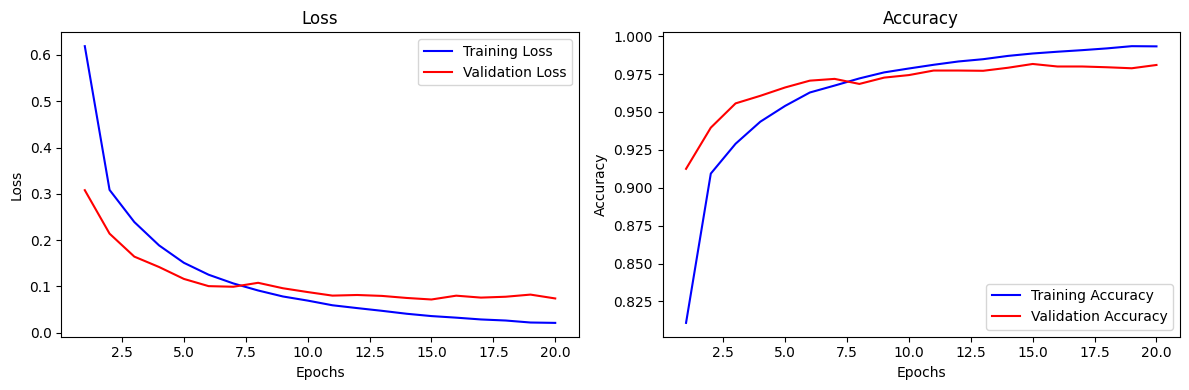

In [16]:
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()